In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import metpy
import numpy as np
from working.sea_breeze.load_barra import load_barra_wind_data, load_barra_variable, load_barra_static
import datetime as dt
import pandas as pd

from working.sea_breeze.load_obs import load_half_hourly_stn_obs

In [2]:
from climtas.nci import GadiClient
client = GadiClient()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46785 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/46785/status,
Dashboard: /proxy/46785/status,Workers: 4
Total threads: 4,Total memory: 18.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34873,Workers: 4
Dashboard: /proxy/46785/status,Total threads: 4
Started: Just now,Total memory: 18.00 GiB
Comm: tcp://127.0.0.1:45673,Total threads: 1
Dashboard: /proxy/34517/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:34515,


In [3]:
# stn_obs = xr.open_dataset("/g/data/w40/clv563/BoM_data_202409/half_hourly_data_netcdf/AWS-data-VIC.nc").sel(time=slice("2023-12-01 00:00","2024-02-29 23:00"))

# u,v = metpy.calc.wind_components(
#     stn_obs.wspd.metpy.convert_units("m/s"),
#     stn_obs.wdir * metpy.units.units.deg)
# stn_obs["u"] = u
# stn_obs["v"] = v

# stn_obs

stn_obs = load_half_hourly_stn_obs("VIC", slice("2023-12-01 00:00","2024-02-29 23:00"))

,name,bmid,lati,long
station,,,,
21,b'YARRAWONGA ...,81124.0,-36.029400,146.030502
23,b'RUTHERGLEN RESEARCH ...,82039.0,-36.104801,146.509399
24,b'WANGARATTA AERO ...,82138.0,-36.420502,146.305603
25,b'HUNTERS HILL ...,82139.0,-36.213699,147.539505
26,b'MOUNT BULLER ...,83024.0,-37.145000,146.439407
27,b'FALLS CREEK ...,83084.0,-36.870800,147.275497
28,b'MOUNT HOTHAM ...,83085.0,-36.977200,147.134201
29,b'OMEO ...,83090.0,-37.101700,147.600800
30,b'GABO ISLAND LIGHTHOUSE ...,84016.0,-37.567902,149.915802


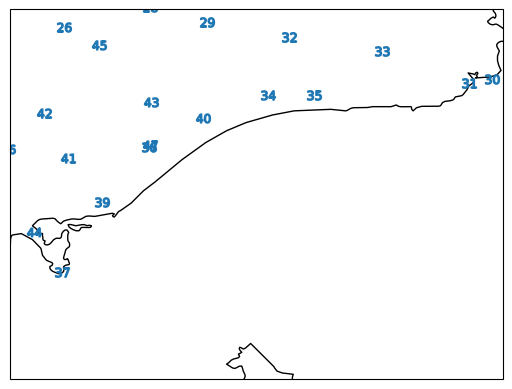

In [4]:
lat_bnds=[-40,-37]
lon_bnds=[146,150]

ax=plt.axes(projection=ccrs.PlateCarree())
[plt.plot(stn_obs.long.sel(station=i),stn_obs.lati.sel(station=i)
          ,ls="none",marker="$"+str(i)+"$",color="tab:blue",ms=10) for i in range(stn_obs.station.shape[0])]
ax.coastlines()
ax.set_ylim(lat_bnds)
ax.set_xlim(lon_bnds)

stn_inds = stn_obs.long >= lon_bnds[0]
stn_obs[["name","bmid","lati","long","station"]].isel(station=stn_inds).to_dataframe()

In [52]:
barra = load_barra_wind_data(
    ["uas","ua1500m"], 
    ["vas","va1500m"], 
    ["ws","ws_1500m"], 
    "2023-12-01 00:00", "2024-02-29 23:59", "AUS-11", "1hr", slice(lat_bnds[0],lat_bnds[1]), slice(lon_bnds[0],lon_bnds[1]))

In [10]:
orog, lsm = load_barra_static("AUS-11", slice(lon_bnds[0],lon_bnds[1]), slice(lat_bnds[0],lat_bnds[1]))

In [55]:
era5 = xr.open_dataset("/g/data/gb02/ab4502/era5_test.nc",chunks={"latitude":5,"longitude":5})

In [58]:
era5

<xarray.Dataset> Size: 992MB
Dimensions:              (time: 744, hybrid: 38, latitude: 45, longitude: 65)
Coordinates:
  * hybrid               (hybrid) float32 152B 100.0 101.0 102.0 ... 136.0 137.0
  * latitude             (latitude) float32 180B -29.0 -29.25 ... -39.75 -40.0
  * longitude            (longitude) float32 260B 140.0 140.2 ... 155.8 156.0
  * time                 (time) datetime64[ns] 6kB 2024-01-01 ... 2024-01-31T...
Data variables:
    u_component_of_wind  (time, hybrid, latitude, longitude) float32 331MB dask.array<chunksize=(744, 38, 5, 5), meta=np.ndarray>
    v_component_of_wind  (time, hybrid, latitude, longitude) float32 331MB dask.array<chunksize=(744, 38, 5, 5), meta=np.ndarray>
    geopotential         (time, hybrid, latitude, longitude) float32 331MB dask.array<chunksize=(744, 38, 5, 5), meta=np.ndarray>
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-08-27 14:20:51.626245
    valid_time_stop:   2024-03-31

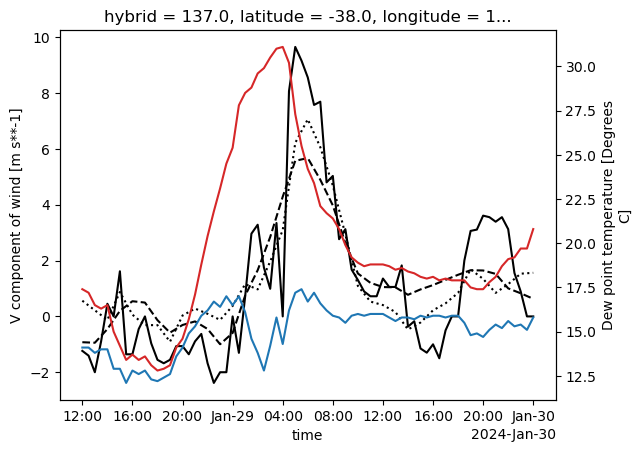

In [60]:
stn_obs.sel(station=40).sel(time=slice("2024-01-28 12:00","2024-01-30 00:00")).v.plot(color="k")

barra.sel(time=slice("2024-01-28 12:00","2024-01-30 00:00")).sel(lon=stn_obs.sel(station=40).long, lat=stn_obs.sel(station=40).lati,method="nearest").vas.plot(color="k",ls=":")
era5.sel(time=slice("2024-01-28 12:00","2024-01-30 00:00"),hybrid=137).sel(longitude=stn_obs.sel(station=40).long, latitude=stn_obs.sel(station=40).lati,method="nearest").v_component_of_wind.plot(color="k",ls="--")

plt.gca().twinx()
stn_obs.sel(station=40).sel(time=slice("2024-01-28 12:00","2024-01-30 00:00")).temp.plot(color="tab:red")
stn_obs.sel(station=40).sel(time=slice("2024-01-28 12:00","2024-01-30 00:00")).Tdew.plot(color="tab:blue")
#plt.gca().axvline(pd.to_datetime("2024-01-29 06:00"),ls=":", color="k")

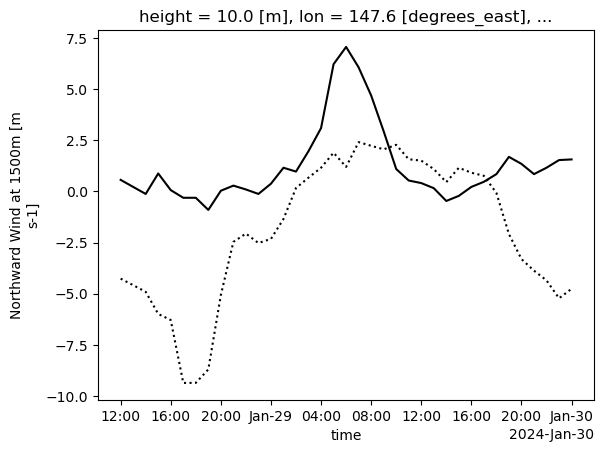

In [54]:
barra.sel(time=slice("2024-01-28 12:00","2024-01-30 00:00")).sel(lon=stn_obs.sel(station=40).long, lat=stn_obs.sel(station=40).lati,method="nearest").vas.plot(color="k",ls="-")
barra.sel(time=slice("2024-01-28 12:00","2024-01-30 00:00")).sel(lon=stn_obs.sel(station=40).long, lat=stn_obs.sel(station=40).lati,method="nearest").va1500m.plot(color="k",ls=":")

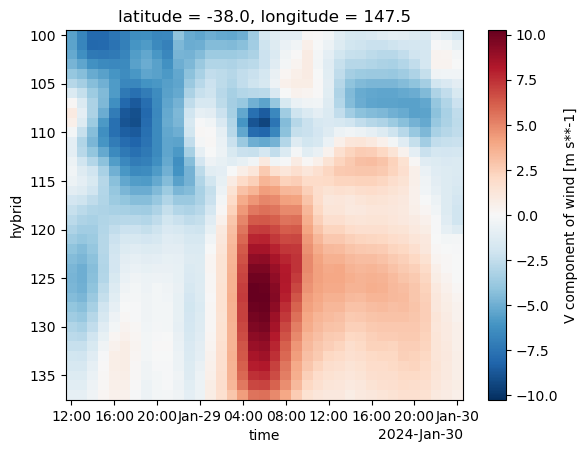

In [75]:
era5.sel(time=slice("2024-01-28 12:00","2024-01-30 00:00")).sel(longitude=stn_obs.sel(station=40).long, latitude=stn_obs.sel(station=40).lati,method="nearest").v_component_of_wind.plot(y="hybrid")
plt.gca().invert_yaxis()

In [72]:
(era5.sel(time=slice("2024-01-28 12:00","2024-01-30 00:00")).sel(longitude=stn_obs.sel(station=40).long, latitude=stn_obs.sel(station=40).lati,method="nearest").mean("time").geopotential/9.8).to_dataframe()

,latitude,longitude,geopotential
hybrid,,,
100.0,-38.0,147.5,4538.644043
101.0,-38.0,147.5,4256.668457
102.0,-38.0,147.5,3983.087402
103.0,-38.0,147.5,3718.707764
104.0,-38.0,147.5,3464.223145
105.0,-38.0,147.5,3220.191895
106.0,-38.0,147.5,2987.040771
107.0,-38.0,147.5,2765.054443
108.0,-38.0,147.5,2554.388672


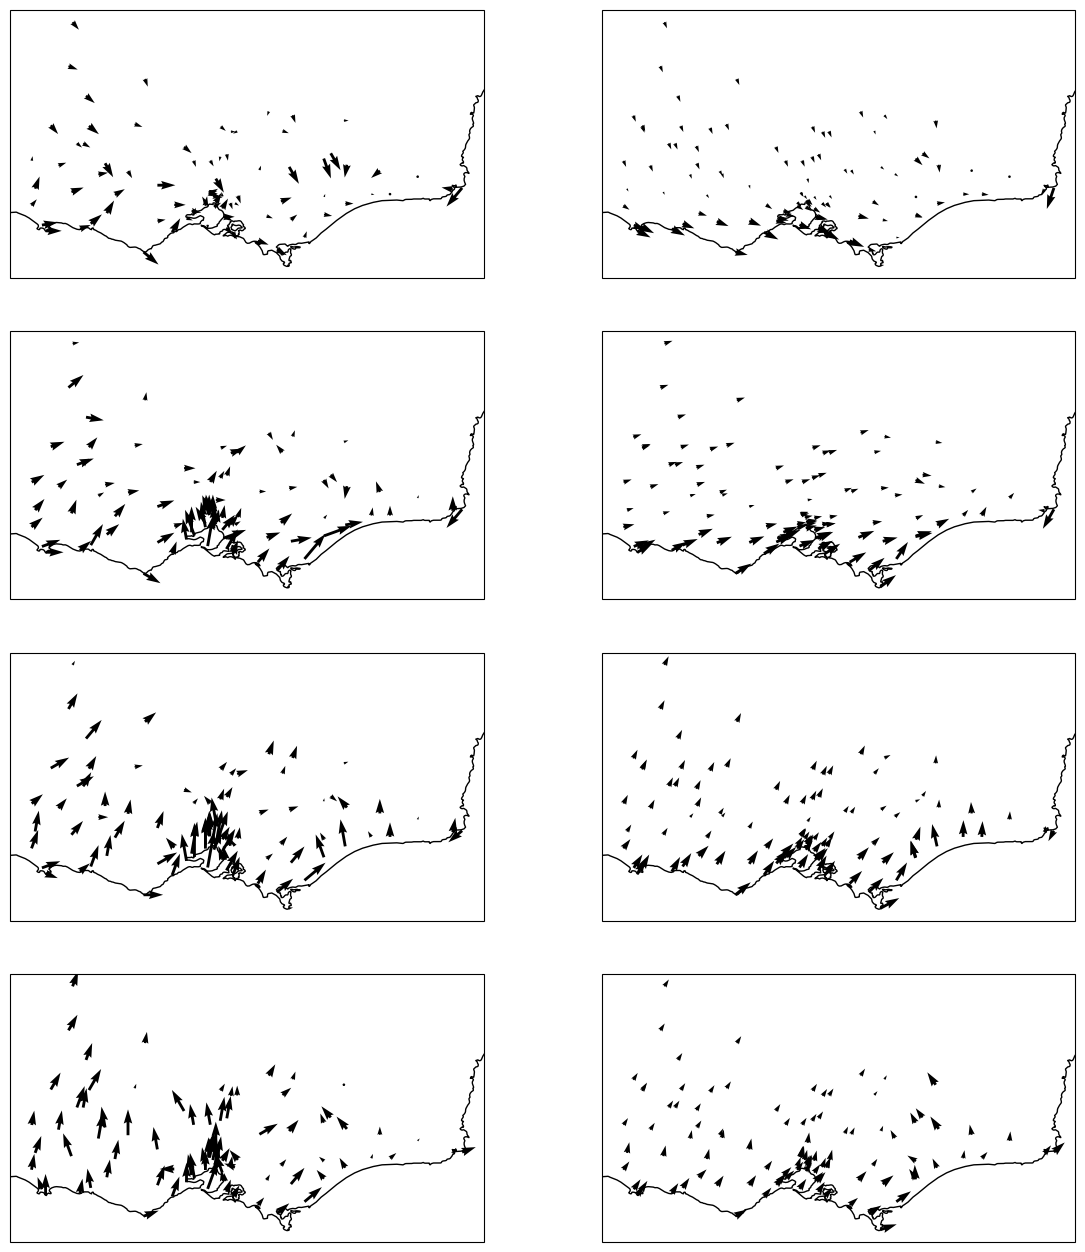

In [40]:
def plot_obs_q(stn_obs, t, ax):
    temp = stn_obs.sel(time=t)
    x = temp.long.values
    y = temp.lati.values
    u = temp.u.values
    v = temp.v.values
    
    ax.quiver(x,y,u,v,scale=150)
    ax.coastlines()

def plot_barra_q(barra, stn_obs, t, ax):
    temp = stn_obs.sel(time=t)
    x = xr.DataArray(temp.long.values, dims="points")
    y = xr.DataArray(temp.lati.values, dims="points")
    u = barra.sel(time=t,lon=x,lat=y,method="nearest").uas.values
    v = barra.sel(time=t,lon=x,lat=y,method="nearest").vas.values
    
    ax.quiver(x,y,u,v,scale=150)
    ax.coastlines()

plt.figure(figsize=[14,16])

plot_obs_q(stn_obs, "2024-01-29 00:00", plt.subplot(4,2,1,projection=ccrs.PlateCarree()))
plot_barra_q(barra, stn_obs, "2024-01-29 00:00", plt.subplot(4,2,2,projection=ccrs.PlateCarree()))

plot_obs_q(stn_obs, "2024-01-29 03:00", plt.subplot(4,2,3,projection=ccrs.PlateCarree()))
plot_barra_q(barra, stn_obs, "2024-01-29 03:00", plt.subplot(4,2,4,projection=ccrs.PlateCarree()))

plot_obs_q(stn_obs, "2024-01-29 06:00", plt.subplot(4,2,5,projection=ccrs.PlateCarree()))
plot_barra_q(barra, stn_obs, "2024-01-29 06:00", plt.subplot(4,2,6,projection=ccrs.PlateCarree()))

plot_obs_q(stn_obs, "2024-01-29 09:00", plt.subplot(4,2,7,projection=ccrs.PlateCarree()))
plot_barra_q(barra, stn_obs, "2024-01-29 09:00", plt.subplot(4,2,8,projection=ccrs.PlateCarree()))

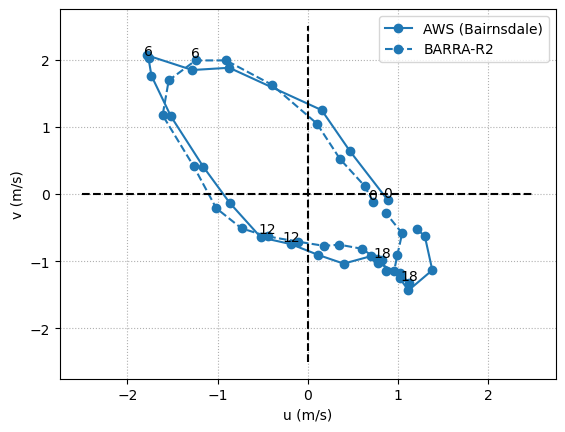

In [90]:
u_comp = stn_obs.sel(station=40)["u"].groupby("time.hour").mean()
v_comp = stn_obs.sel(station=40)["v"].groupby("time.hour").mean()
u_comp = u_comp - u_comp.mean()
v_comp = v_comp - v_comp.mean()
plt.plot(u_comp,v_comp,marker="o",label="AWS (Bairnsdale)")
[plt.text(u_comp[i],v_comp[i],str(i),ha="center",va="bottom",size=10) for i in [0,6,12,18]]

u_comp = barra.sel(lon=stn_obs.sel(station=40).long, lat=stn_obs.sel(station=40).lati, method="nearest")["uas"].groupby("time.hour").mean()
v_comp = barra.sel(lon=stn_obs.sel(station=40).long, lat=stn_obs.sel(station=40).lati, method="nearest")["vas"].groupby("time.hour").mean()
u_comp = u_comp - u_comp.mean()
v_comp = v_comp - v_comp.mean()
plt.plot(u_comp,v_comp,marker="o",color="tab:blue",ls="--",label="BARRA-R2")
[plt.text(u_comp[i],v_comp[i],str(i),ha="center",va="bottom",size=10) for i in [0,6,12,18]]

plt.gca().grid(ls=":")
plt.plot([0,0],[-2.5,2.5],color="k",ls="--")
plt.plot([-2.5,2.5],[0,0],color="k",ls="--")

plt.xlabel("u (m/s)")
plt.ylabel("v (m/s)")

plt.legend(loc=1)

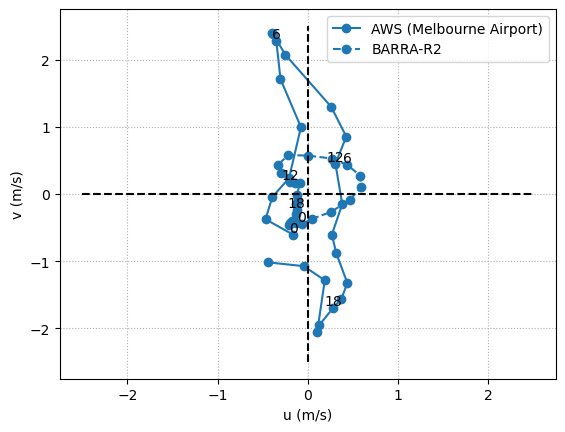

In [152]:
u_comp = stn_obs.sel(station=55)["u"].groupby("time.hour").mean()
v_comp = stn_obs.sel(station=55)["v"].groupby("time.hour").mean()
u_comp = u_comp - u_comp.mean()
v_comp = v_comp - v_comp.mean()
plt.plot(u_comp,v_comp,marker="o",label="AWS (Melbourne Airport)")
[plt.text(u_comp[i],v_comp[i],str(i),ha="center",va="bottom",size=10) for i in [0,6,12,18]]

u_comp = barra.sel(lon=stn_obs.sel(station=55).long, lat=stn_obs.sel(station=55).lati, method="nearest")["uas"].groupby("time.hour").mean()
v_comp = barra.sel(lon=stn_obs.sel(station=55).long, lat=stn_obs.sel(station=55).lati, method="nearest")["vas"].groupby("time.hour").mean()
u_comp = u_comp - u_comp.mean()
v_comp = v_comp - v_comp.mean()
plt.plot(u_comp,v_comp,marker="o",color="tab:blue",ls="--",label="BARRA-R2")
[plt.text(u_comp[i],v_comp[i],str(i),ha="center",va="bottom",size=10) for i in [0,6,12,18]]

plt.gca().grid(ls=":")
plt.plot([0,0],[-2.5,2.5],color="k",ls="--")
plt.plot([-2.5,2.5],[0,0],color="k",ls="--")

plt.xlabel("u (m/s)")
plt.ylabel("v (m/s)")

plt.legend(loc=1)

In [51]:
#Load the AMDAR data from Qinuo
amdar = xr.open_dataset("/g/data/gb02/ab4502/AMDAR/MelbourneAirport_interpolated.nc").sel(time=slice("2017-12-01 00:00","2018-02-28 23:59"))



Text(0.5, 0, 'Time (LST)')

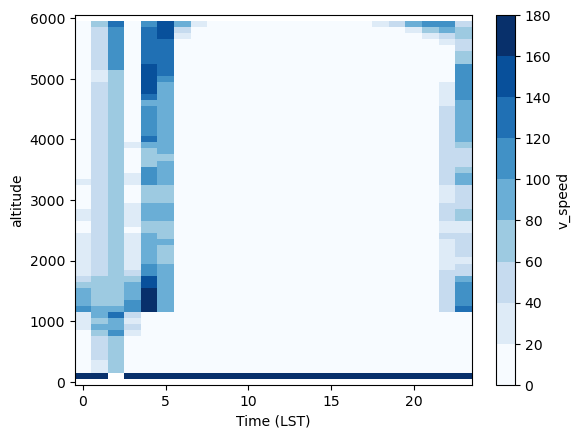

In [54]:
amdar.v_speed.isnull().groupby("time.hour").sum().plot(y="altitude",levels=10,cmap="Blues")
plt.xlabel("Time (LST)")

In [56]:
#Mask 2300-0400 hours LST following Qinuo's paper
amdar.loc[{"time":np.in1d(amdar.time.dt.hour,[1,2])}] = np.nan
amdar.loc[{"time":np.in1d(amdar.time.dt.hour,[22,23,0,3,4,5]),"altitude":slice(1000,6000)}] = np.nan

#I think the times are in LST (Local solar time?) so do an approximate conversion to UTC by subtracting 10 hours
amdar["time"] = pd.to_datetime(amdar.time) + dt.timedelta(hours=-10)

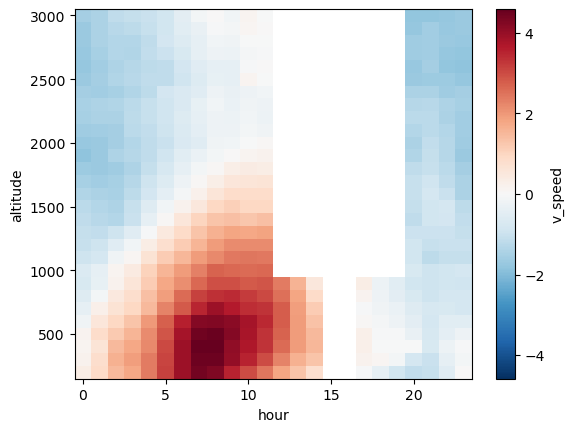

In [57]:
amdar.v_speed.groupby("time.hour").mean().sel(altitude=slice(200,3000)).plot(y="altitude")

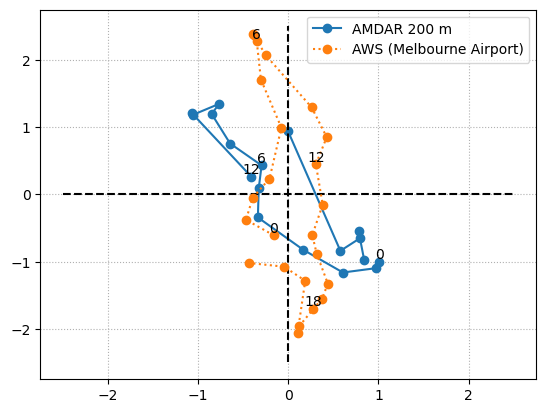

In [28]:
z=1500

u_comp = amdar.u_speed.sel(altitude=z).groupby("time.hour").mean()
v_comp = amdar.v_speed.sel(altitude=z).groupby("time.hour").mean()
u_comp = u_comp - u_comp.mean()
v_comp = v_comp - v_comp.mean()
plt.plot(u_comp,v_comp,marker="o",label="AMDAR 200 m")
[plt.text(u_comp[i],v_comp[i],str(i),ha="center",va="bottom",size=10) for i in [0,6,12,18]];

plt.gca().grid(ls=":")
plt.plot([0,0],[-2.5,2.5],color="k",ls="--")
plt.plot([-2.5,2.5],[0,0],color="k",ls="--")

u_comp = stn_obs.sel(station=55)["u"].groupby("time.hour").mean()
v_comp = stn_obs.sel(station=55)["v"].groupby("time.hour").mean()
u_comp = u_comp - u_comp.mean()
v_comp = v_comp - v_comp.mean()
plt.plot(u_comp,v_comp,marker="o",label="AWS (Melbourne Airport)",ls=":")
[plt.text(u_comp[i],v_comp[i],str(i),ha="center",va="bottom",size=10) for i in [0,6,12,18]];

plt.legend(loc=1)

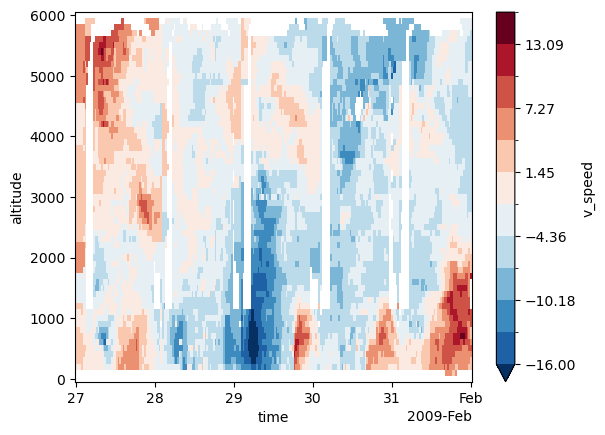

In [186]:
amdar.sel(time=slice("2009-01-27 00:00", "2009-02-01 00:00")).v_speed.plot(x="time",vmin=-16,vmax=16,cmap="RdBu_r",levels=12)